# 1. Import Necessary Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 2. Load the Dataset

In [91]:
df = pd.read_csv('california_data.csv')
df.shape

(1741433, 42)

In [92]:
df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# 3. Initial Data Exploration

### 3.1 Basic Info

In [93]:
# Display basic info about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741433 entries, 0 to 1741432
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  City                   object 
 11  County                 object 
 12  Zipcode                object 
 13  Airport_Code           object 
 14  Weather_Timestamp      object 
 15  Temperature(F)         float64
 16  Wind_Chill(F)          float64
 17  Humidity(%)            float64
 18  Pressure(in)           float64
 19  Visibility(mi)         float64
 20  Wind_Direction         object 
 21  Wind_Speed(mph)        float64
 22  Prec

In [94]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County',
       'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

### 3.2 Descriptive Statistics

In [95]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
count 1741433.000 1741433.000 1741433.000 1104102.000 1104102.000   
mean        2.166      35.630    -119.500      35.652    -119.461   
std         0.407       2.093       1.937       2.132       1.920   
min         1.000      32.543    -124.375      32.542    -124.400   
25%         2.000      33.976    -121.520      33.975    -121.441   
50%         2.000      34.236    -118.440      34.265    -118.446   
75%         2.000      37.702    -117.920      37.704    -117.894   
max         4.000      42.005    -114.139      42.145    -114.140   

       Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
count   1741433.000     1695464.000    1230468.000  1693092.000   1704307.000   
mean          0.484          63.900         62.760       58.714        29.631   
std           1.353          13.591         14.595       24.215         0.776   
min           0.000         -

In [96]:
# Descriptive statistics for categorical features
print("\nCategorical Features:")
print(df.describe(include=['object']))


Categorical Features:
             ID   Source           Start_Time             End_Time  \
count   1741433  1741433              1741433              1741433   
unique  1741433        3              1394898              1555839   
top       A-729  Source1  2022-04-26 16:14:30  2019-10-17 18:07:45   
freq          1  1104102                   54                   31   

               City       County  Zipcode Airport_Code    Weather_Timestamp  \
count       1741422      1741433  1740836      1739317              1708628   
unique         1268           58   129022          142               422496   
top     Los Angeles  Los Angeles    91761         KCQT  2022-03-13 01:53:00   
freq         156491       526851    11247       118332                  299   

       Wind_Direction Weather_Condition Sunrise_Sunset Civil_Twilight  \
count         1695244           1701655        1740090        1740090   
unique             24                87              2              2   
top        

# 4. Data Cleaning and Modification

### 4.1 Tackling Missing Values

In [97]:
# Checking for missing values
def report_missing_values(dataframe):
    missing_values_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    missing_values_percentage = missing_values_percentage.round(2)
    print("\nPercentage of Missing Values in Each Column:")
    print(missing_values_percentage)

report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                       0.000
Source                   0.000
Severity                 0.000
Start_Time               0.000
End_Time                 0.000
Start_Lat                0.000
Start_Lng                0.000
End_Lat                 36.600
End_Lng                 36.600
Distance(mi)             0.000
City                     0.000
County                   0.000
Zipcode                  0.030
Airport_Code             0.120
Weather_Timestamp        1.880
Temperature(F)           2.640
Wind_Chill(F)           29.340
Humidity(%)              2.780
Pressure(in)             2.130
Visibility(mi)           2.300
Wind_Direction           2.650
Wind_Speed(mph)          9.350
Precipitation(in)       32.510
Weather_Condition        2.280
Amenity                  0.000
Bump                     0.000
Crossing                 0.000
Give_Way                 0.000
Junction                 0.000
No_Exit                  0.000
Railway                 

In [98]:
# Dropping columns with more than 20% of missing values
missing_values_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 20].index
df.drop(columns = columns_to_drop, inplace=True)
print(columns_to_drop)

Index(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')


In [99]:
# For each county, find the most common city and replace missing cities with this value
for county in df['County'].unique():
    most_common_city = df[df['County'] == county]['City'].mode()[0]
    df.loc[(df['County'] == county) & (df['City'].isnull()), 'City'] = most_common_city

# Similar approach for Zipcode
for county in df['County'].unique():
    most_common_zip = df[df['County'] == county]['Zipcode'].mode()[0]
    df.loc[(df['County'] == county) & (df['Zipcode'].isnull()), 'Zipcode'] = most_common_zip

In [100]:
report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                      0.000
Source                  0.000
Severity                0.000
Start_Time              0.000
End_Time                0.000
Start_Lat               0.000
Start_Lng               0.000
Distance(mi)            0.000
City                    0.000
County                  0.000
Zipcode                 0.000
Airport_Code            0.120
Weather_Timestamp       1.880
Temperature(F)          2.640
Humidity(%)             2.780
Pressure(in)            2.130
Visibility(mi)          2.300
Wind_Direction          2.650
Wind_Speed(mph)         9.350
Weather_Condition       2.280
Amenity                 0.000
Bump                    0.000
Crossing                0.000
Give_Way                0.000
Junction                0.000
No_Exit                 0.000
Railway                 0.000
Roundabout              0.000
Station                 0.000
Stop                    0.000
Traffic_Calming         0.000
Traffic_Signal          

In [101]:
# Imputation

missing_percentages = df.isnull().mean() * 100
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

numerical_impute_cols = numerical_cols[(missing_percentages[numerical_cols] > 5) & (missing_percentages[numerical_cols] <= 20)]

# Imputing with the median for numerical columns with missing percentages from 5 - 20 percent
for col in numerical_impute_cols:
    df[col] = df[col].fillna(df[col].median())

if 'Humidity(%)' in numerical_impute_cols:
    df['Humidity(%)'] = df['Humidity(%)'].fillna(int(df['Humidity(%)'].median()))

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_impute_cols = categorical_cols[missing_percentages[categorical_cols] < 5]

# Imputing with mode for categorical columns with missing percentages less than 5 percent
for col in categorical_impute_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                      0.000
Source                  0.000
Severity                0.000
Start_Time              0.000
End_Time                0.000
Start_Lat               0.000
Start_Lng               0.000
Distance(mi)            0.000
City                    0.000
County                  0.000
Zipcode                 0.000
Airport_Code            0.000
Weather_Timestamp       0.000
Temperature(F)          2.640
Humidity(%)             2.780
Pressure(in)            2.130
Visibility(mi)          2.300
Wind_Direction          0.000
Wind_Speed(mph)         0.000
Weather_Condition       0.000
Amenity                 0.000
Bump                    0.000
Crossing                0.000
Give_Way                0.000
Junction                0.000
No_Exit                 0.000
Railway                 0.000
Roundabout              0.000
Station                 0.000
Stop                    0.000
Traffic_Calming         0.000
Traffic_Signal          

In [102]:
# Dropping records for columns with missing percentage < 1%
def drop_records_with_low_missing_values(dataframe, threshold = 3.0):
    missing_values_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    columns_to_check = missing_values_percentage[missing_values_percentage <= threshold].index
    df = dataframe.dropna(subset=columns_to_check)
    return df

df = drop_records_with_low_missing_values(df)
report_missing_values(df)


Percentage of Missing Values in Each Column:
ID                      0.000
Source                  0.000
Severity                0.000
Start_Time              0.000
End_Time                0.000
Start_Lat               0.000
Start_Lng               0.000
Distance(mi)            0.000
City                    0.000
County                  0.000
Zipcode                 0.000
Airport_Code            0.000
Weather_Timestamp       0.000
Temperature(F)          0.000
Humidity(%)             0.000
Pressure(in)            0.000
Visibility(mi)          0.000
Wind_Direction          0.000
Wind_Speed(mph)         0.000
Weather_Condition       0.000
Amenity                 0.000
Bump                    0.000
Crossing                0.000
Give_Way                0.000
Junction                0.000
No_Exit                 0.000
Railway                 0.000
Roundabout              0.000
Station                 0.000
Stop                    0.000
Traffic_Calming         0.000
Traffic_Signal          

In [103]:
df.shape

(1686299, 36)

### 4.2 Adding a Variable: Elapsed_time

In [104]:
# Converting Start_Time And End_time to datetime64 type
df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.slice(0,19), format= '%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'].str.slice(0,19), format= '%Y-%m-%d %H:%M:%S')

In [105]:
# Adding a variable elapsed_time
df['elapsed_time'] = df['End_Time'] - df['Start_Time']
df['elapsed_time'] = df['elapsed_time']/np.timedelta64(1,'m')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,Zipcode,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085,-122.233,0.000,Vallejo,Solano,94591,KAPC,2016-06-21 10:54:00,75.000,48.000,30.000,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
1,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.632,-122.084,0.000,Hayward,Alameda,94544,KHWD,2016-06-21 10:54:00,75.000,48.000,30.060,10.000,WSW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,46.383
2,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.897,-122.071,0.000,Walnut Creek,Contra Costa,94595,KCCR,2016-06-21 10:53:00,82.900,31.000,29.970,10.000,NNW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
3,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334,-122.032,0.000,Cupertino,Santa Clara,95014,KNUQ,2016-06-21 10:56:00,75.900,48.000,30.040,10.000,NNE,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000
4,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.251,-121.911,0.000,San Jose,Santa Clara,95118,KRHV,2016-06-21 09:50:00,75.200,41.000,30.060,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,47.833


In [106]:
# Adding a few more columns: dayof accident, hour of accident, Month of accident
df['day_of_week']= df['Start_Time'].dt.weekday.astype('int64')
df['hour_of_day']= df['Start_Time'].dt.hour.astype('int64')
df['month_of_year']= df['Start_Time'].dt.month.astype('int64')
df['Year']= df['Start_Time'].dt.year.astype('int64')

# 5. Exploratory Analysis

### 5.1 Distribution of Numerical Features

#### 5.1.1 Univariate Analysis

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686299 entries, 0 to 1741432
Data columns (total 41 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1686299 non-null  object        
 1   Source                 1686299 non-null  object        
 2   Severity               1686299 non-null  int64         
 3   Start_Time             1686299 non-null  datetime64[ns]
 4   End_Time               1686299 non-null  datetime64[ns]
 5   Start_Lat              1686299 non-null  float64       
 6   Start_Lng              1686299 non-null  float64       
 7   Distance(mi)           1686299 non-null  float64       
 8   City                   1686299 non-null  object        
 9   County                 1686299 non-null  object        
 10  Zipcode                1686299 non-null  object        
 11  Airport_Code           1686299 non-null  object        
 12  Weather_Timestamp      1686299 no

In [108]:
# Number of Numerical Features
ctr = 0 
for i in df.columns:
    if df[i].dtype == int or df[i].dtype==float:
        ctr+=1
        print(i)
print("Number of numerical features: ",ctr)

Severity
Start_Lat
Start_Lng
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
elapsed_time
day_of_week
hour_of_day
month_of_year
Year
Number of numerical features:  14


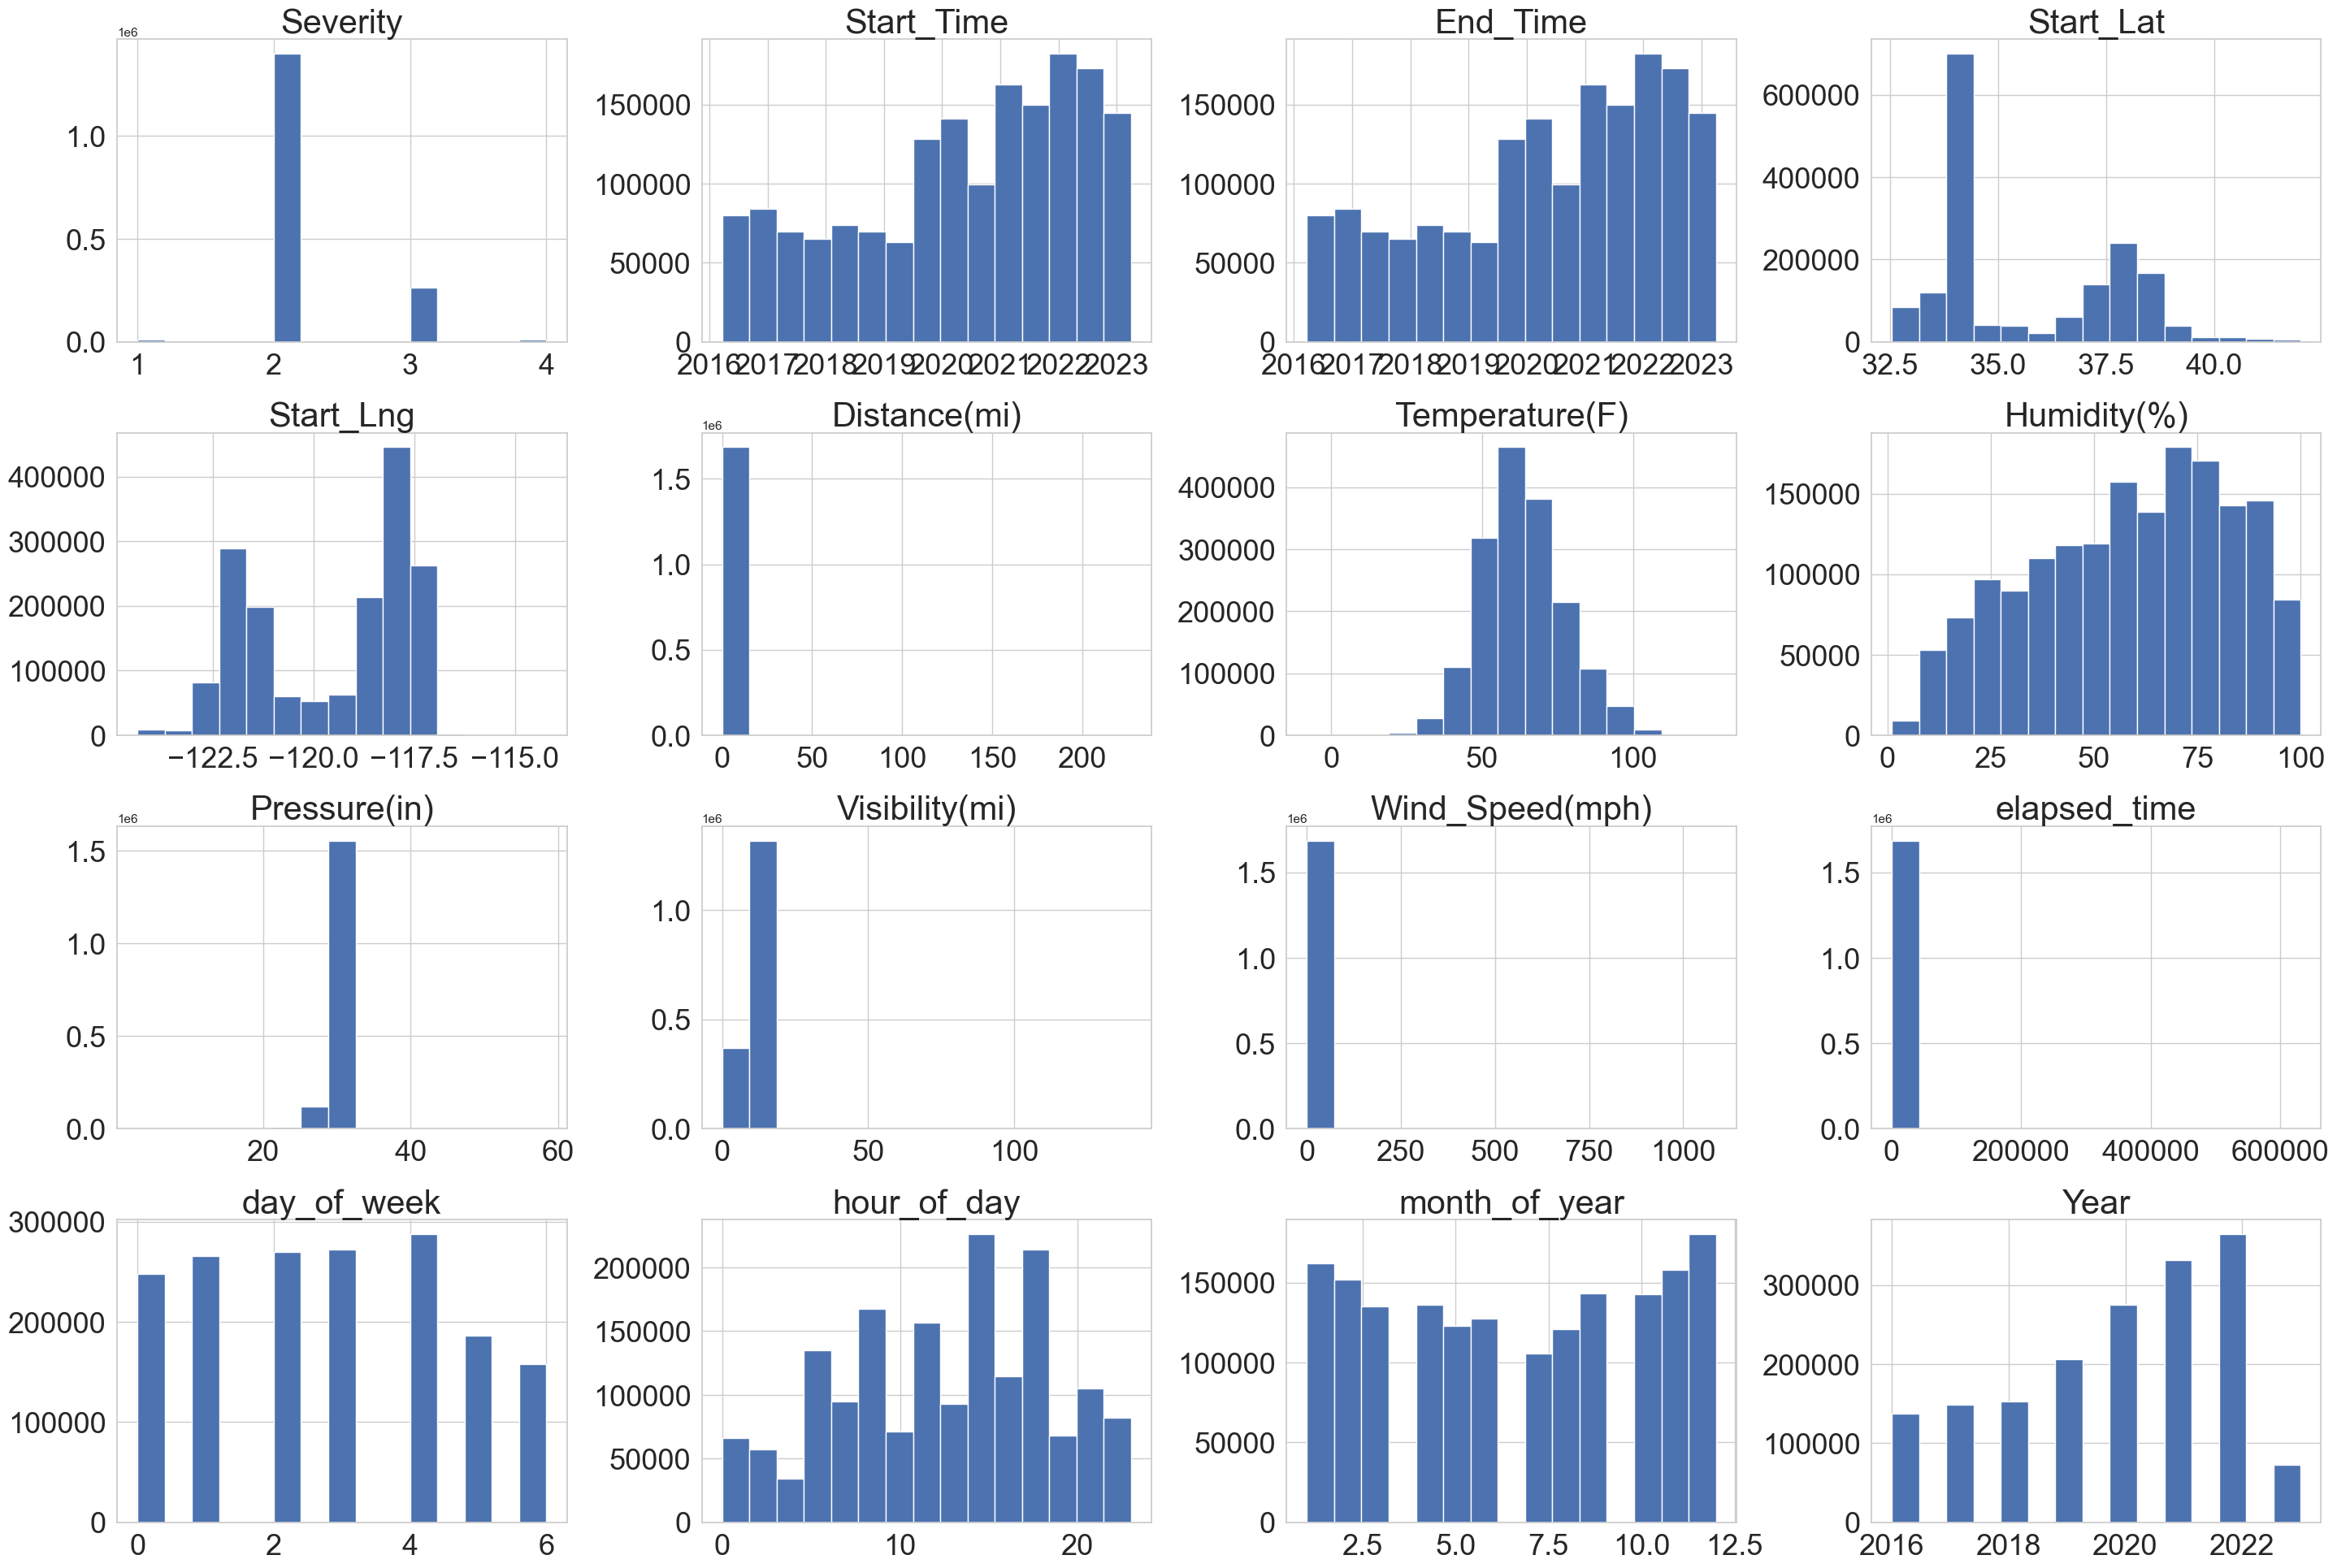

In [109]:
# Distribution
axes = df.hist(bins=15, figsize=(35, 30), layout=(5, 4))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=30) 
    ax.set_xlabel(ax.get_xlabel(), fontsize=24) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=28)  
    ax.tick_params(axis='both', which='major', labelsize=26) 

plt.show()

Inference: 

1. **Severity**: The majority of accidents have a severity of *2 or 3*, with 2 being the most common. There are very few accidents with severity 1 or 4, indicating that most accidents are of moderate severity. There seems to be imbalance in this variable which will be a problem if we consider it as a predictor variable later on.

2. **Start_Time/End_Time**: Accidents appear to be more frequent during certain periods, possibly indicating seasonal or monthly trends.

3. **Start_Lat and Start_Lng (Latitude and Longitude)**: Both start latitude and longitude show a *unimodal* distribution, which suggests that accidents are concentrated in a specific geographic area. The peaks in these distributions indicate a particular location where accidents are more frequent.

4. **Temperature(F)**: The temperature distribution is *multimodal*, indicating that accidents have occurred over a range of different temperatures. 

5. **Humidity(%)**: This feature also shows a *multimodal* distribution with a slight skew towards higher humidity levels, implying that many accidents occur in conditions of moderate to high humidity.

5. **Pressure(in)**: The atmospheric pressure at the time of accidents seems to be *normally* distributed, suggesting no particular trend or bias towards specific pressure conditions during accidents.

6. **Visibility(mi)**: There's a sharp peak at high visibility distances, which indicates that most accidents happen in *clear* conditions. The lack of bars at lower visibility might be due to less frequent driving or fewer accidents reported during poor visibility conditions.

7. **Wind_Speed(mph)**: The wind speed histogram shows a *right-skewed* distribution, meaning most accidents happen at lower wind speeds, with fewer accidents occurring as wind speed increases.

8. **Distance(mi)**: This feature has a highly *right-skewed* distribution with most accidents occurring with a minimal distance impact, possibly indicating that many accidents happen without affecting a significant stretch of road.

9. **day_of_week**: Accidents appear to increase *midweek*, suggesting a possible correlation with workweek traffic patterns.

10. **hour_of_day**: There are peaks indicative of *rush hours*, suggesting more accidents occur during times of *heavy traffic*.

11. **month_of_year**: The fluctuation in accidents throughout the year may reflect *seasonal influences* on driving conditions.

12. **elapsed_time**: Most accidents have a *short duration*, with a steep decline in frequency as duration increases, indicating quick resolutions.

Overall, this initial visualization indicates that the majority of reported accidents occur under **moderate severity, in clear and dry conditions, and are concentrated in certain geographic locations**. It’s important to consider that these are raw distributions and do not account for other factors that might affect accident rates, such as traffic volume, road conditions, and driver behavior. More in-depth analysis would be required to draw more concrete conclusions and to understand the causal factors behind these distributions.

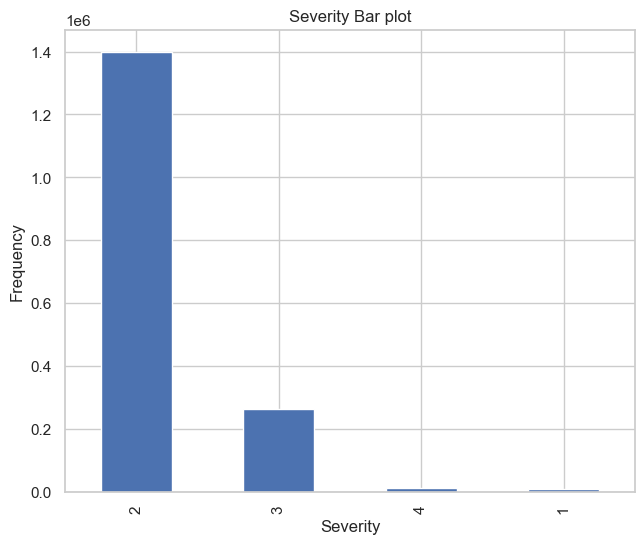

In [110]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,3)
plt1 = df.Severity.value_counts().plot(kind='bar')
plt.title('Severity Bar plot')
plt1.set(xlabel = 'Severity', ylabel='Frequency')

plt.show()

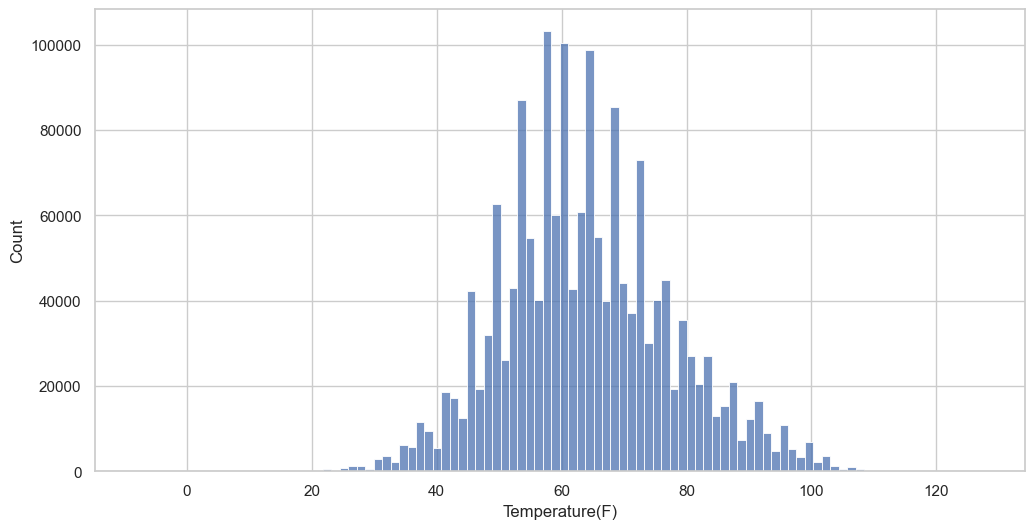

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(df['Temperature(F)'], kde=False, bins=100)
plt.show()

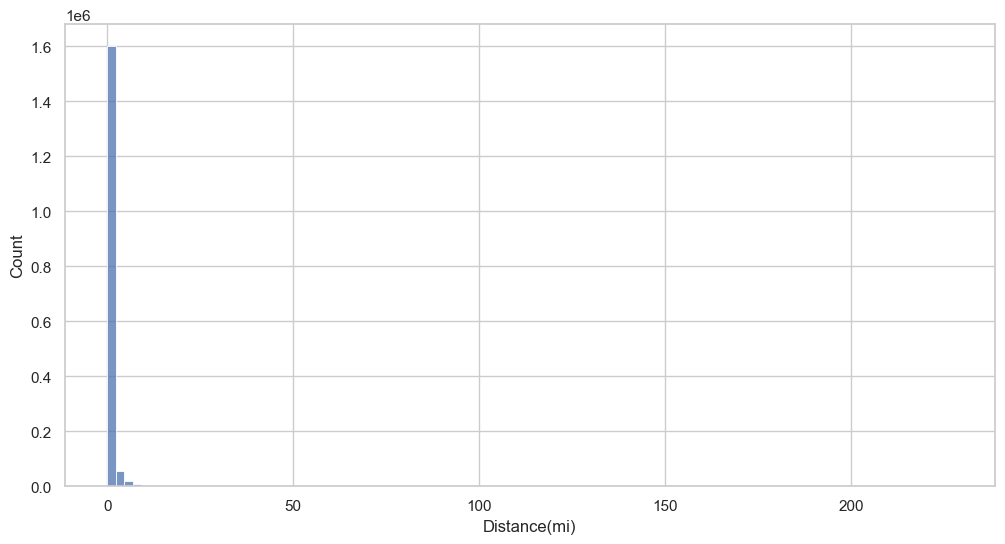

In [112]:
# Histogram for 'Distance(mi)'
plt.figure(figsize=(12,6))
sns.histplot(df['Distance(mi)'], kde=False, bins=100)
plt.show()

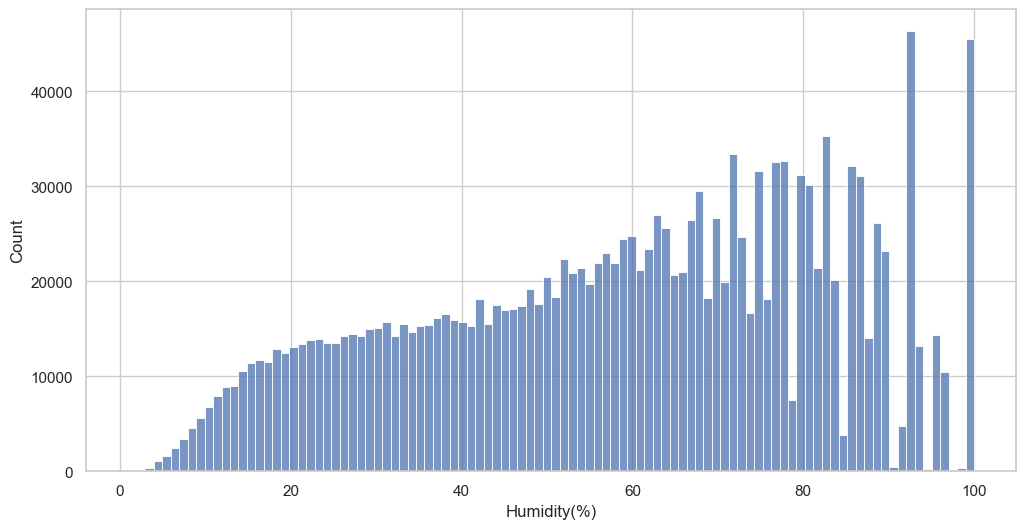

In [113]:
# Histogram for 'Humidity'
plt.figure(figsize=(12,6))
sns.histplot(df['Humidity(%)'], kde=False, bins=100)
plt.show()

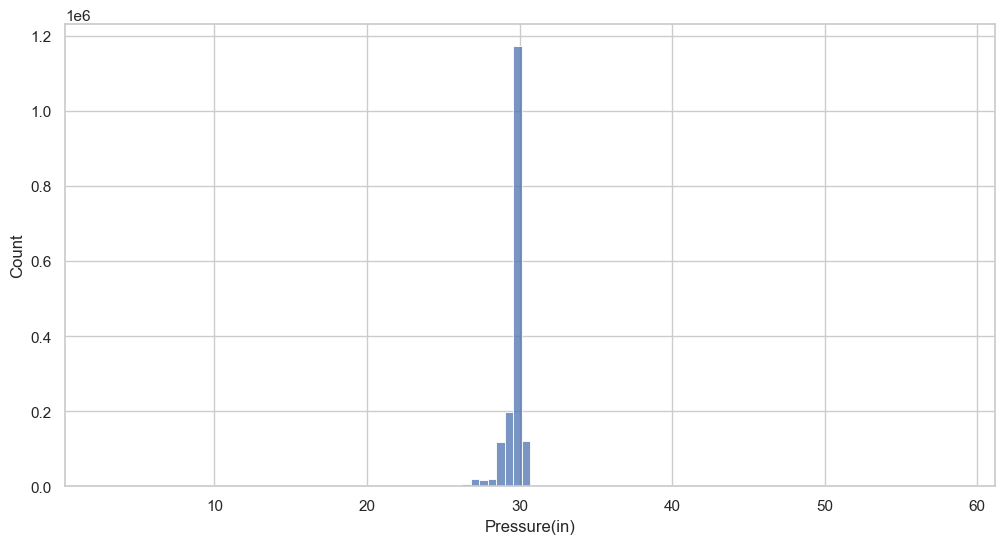

In [114]:
# Histogram for 'Pressure'
plt.figure(figsize=(12,6))
sns.histplot(df['Pressure(in)'], kde=False, bins=100)
plt.show()

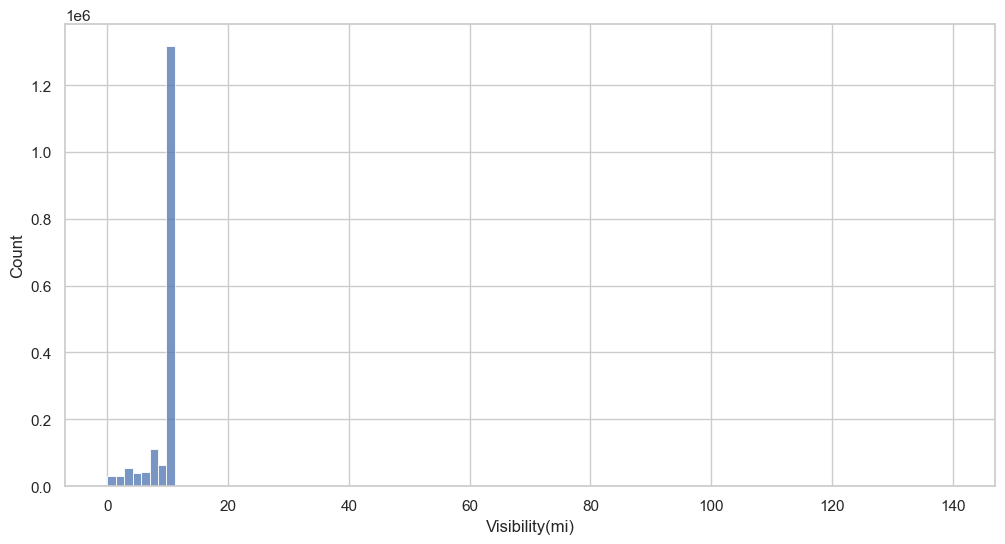

In [115]:
# Histogram for 'Visibility'
plt.figure(figsize=(12,6))
sns.histplot(df['Visibility(mi)'], kde=False, bins=100)
plt.show()

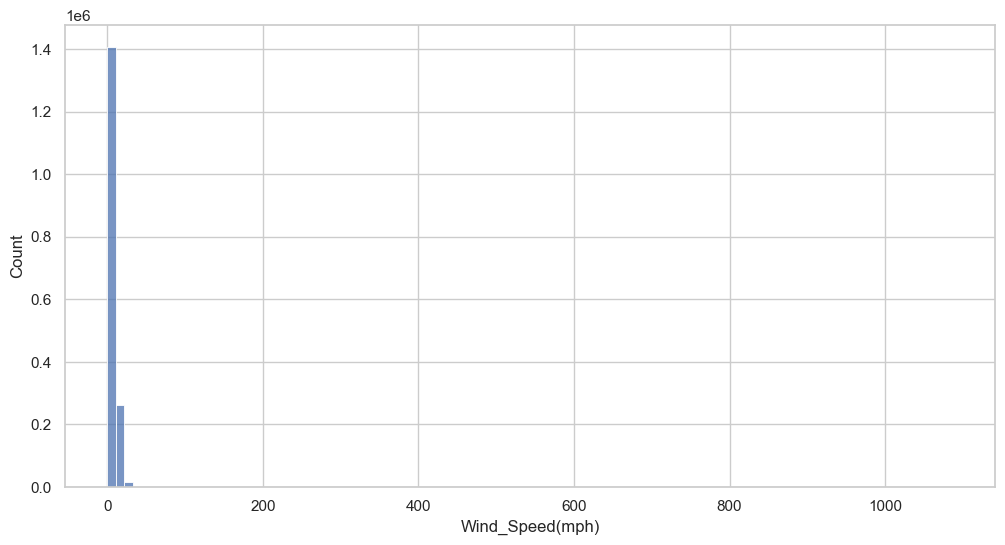

In [116]:
# Histogram for 'Wind speed'
plt.figure(figsize=(12,6))
sns.histplot(df['Wind_Speed(mph)'], kde=False, bins=100)
plt.show()

#### 5.1.2 Bivariate Analysis

<Axes: xlabel='Severity', ylabel='elapsed_time'>

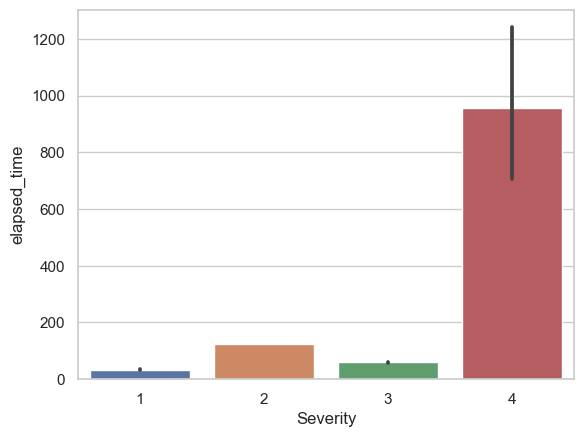

In [117]:
sns.barplot(x='Severity', y='elapsed_time', data=df)

Inference:

1. **Severity 1**: The accidents with severity 1 have the shortest average elapsed time, suggesting these could be minor incidents.
2. **Severity 2 and 3**: Severity 2 and 3 accidents have a higher average elapsed time than severity 1, which could indicate a moderate impact on traffic or longer resolution times.
3. **Severity 4**: There is a significant jump in the average elapsed time for severity 4 accidents, which are likely to be the most severe. The long bar suggests these incidents have a substantial impact, potentially involving more serious damages or injuries, leading to longer durations for clearance.

The error bar on the severity 4 column indicates a high variance in the elapsed time for these incidents, which suggests a wide range of outcomes within this category.

### 5.2 Analysis of Categorical Features

#### 5.2.1 Univariate Analysis

In [118]:
print(df.select_dtypes(include=['object', 'category']).describe().T)

                         count   unique                  top     freq
ID                     1686299  1686299                A-729        1
Source                 1686299        3              Source1  1067154
City                   1686299     1182          Los Angeles   155103
County                 1686299       58          Los Angeles   507099
Zipcode                1686299   126005                91761    11235
Airport_Code           1686299      140                 KCQT   117257
Weather_Timestamp      1686299   417436  2022-03-13 01:53:00      299
Wind_Direction         1686299       24                 CALM   327440
Weather_Condition      1686299       84                 Fair   767496
Sunrise_Sunset         1686299        2                  Day  1100579
Civil_Twilight         1686299        2                  Day  1171351
Nautical_Twilight      1686299        2                  Day  1254695
Astronomical_Twilight  1686299        2                  Day  1325107


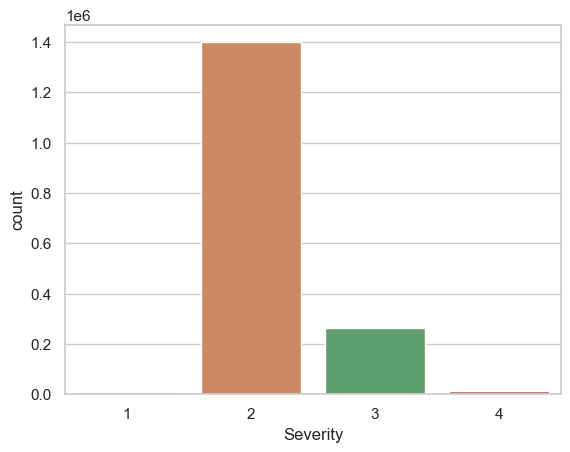

In [119]:
# Severity
sns.countplot(x='Severity', data=df)
plt.show()

- Clear Data Imbalance.

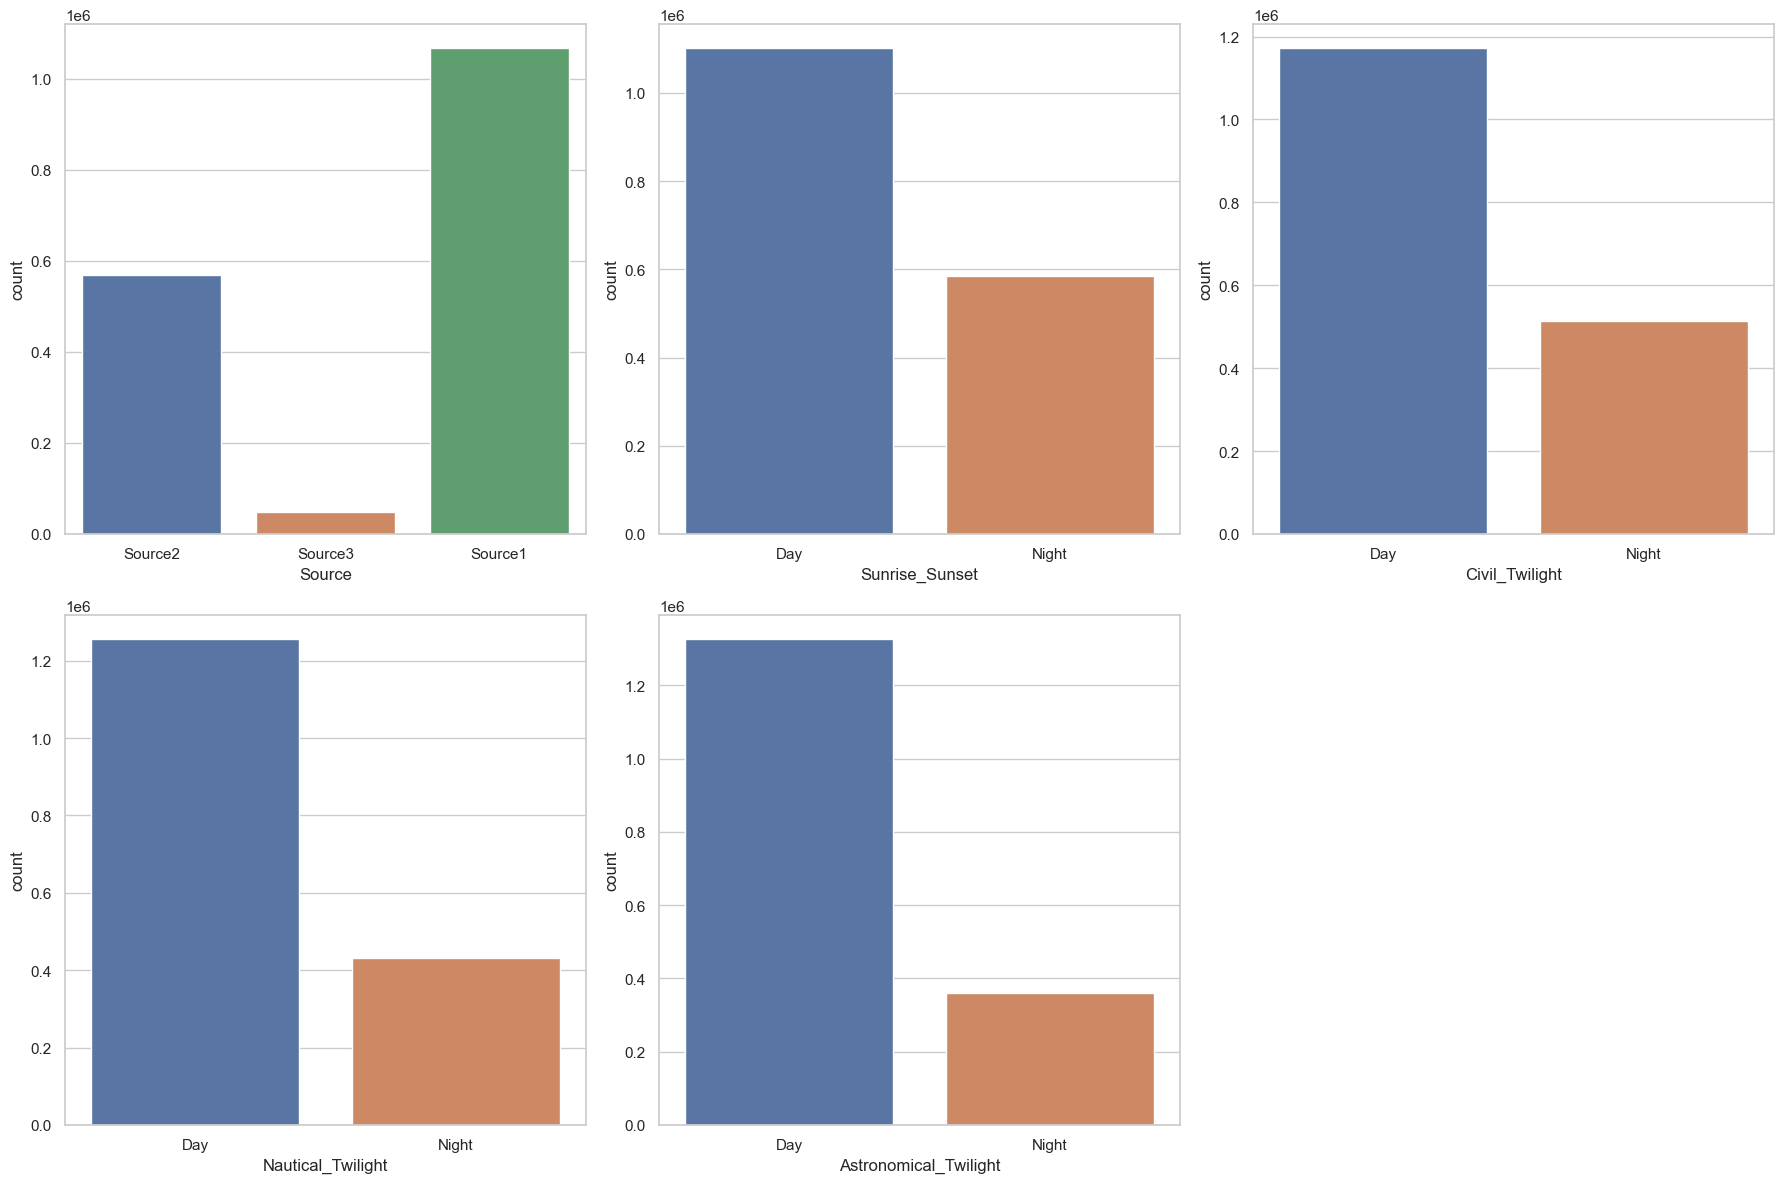

In [120]:
plt.figure(figsize=(18, 12))

cols = ['Source', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for i in range(len(cols)) :
    plt.subplot(2, 3, i+1)  
    sns.countplot(x= cols[i], data=df)

plt.tight_layout()
plt.show()

Inference:

1. **Source**: The majority of data comes from 'Source1', which suggests that there is an imbalance in the representation of sources. 'Source2' and 'Source3' are much less represented.

2. **Sunrise_Sunset**: There are significantly more accidents reported during the day than at night.

3. **Civil_Twilight**: Similarly, more accidents occur during the day than during civil twilight or night.

4. **Nautical_Twilight**: The pattern continues with most accidents happening during the day, as compared to nautical twilight or night.

5. **Astronomical_Twilight**: Again, day incidents are more prevalent than those occurring during astronomical twilight or night.



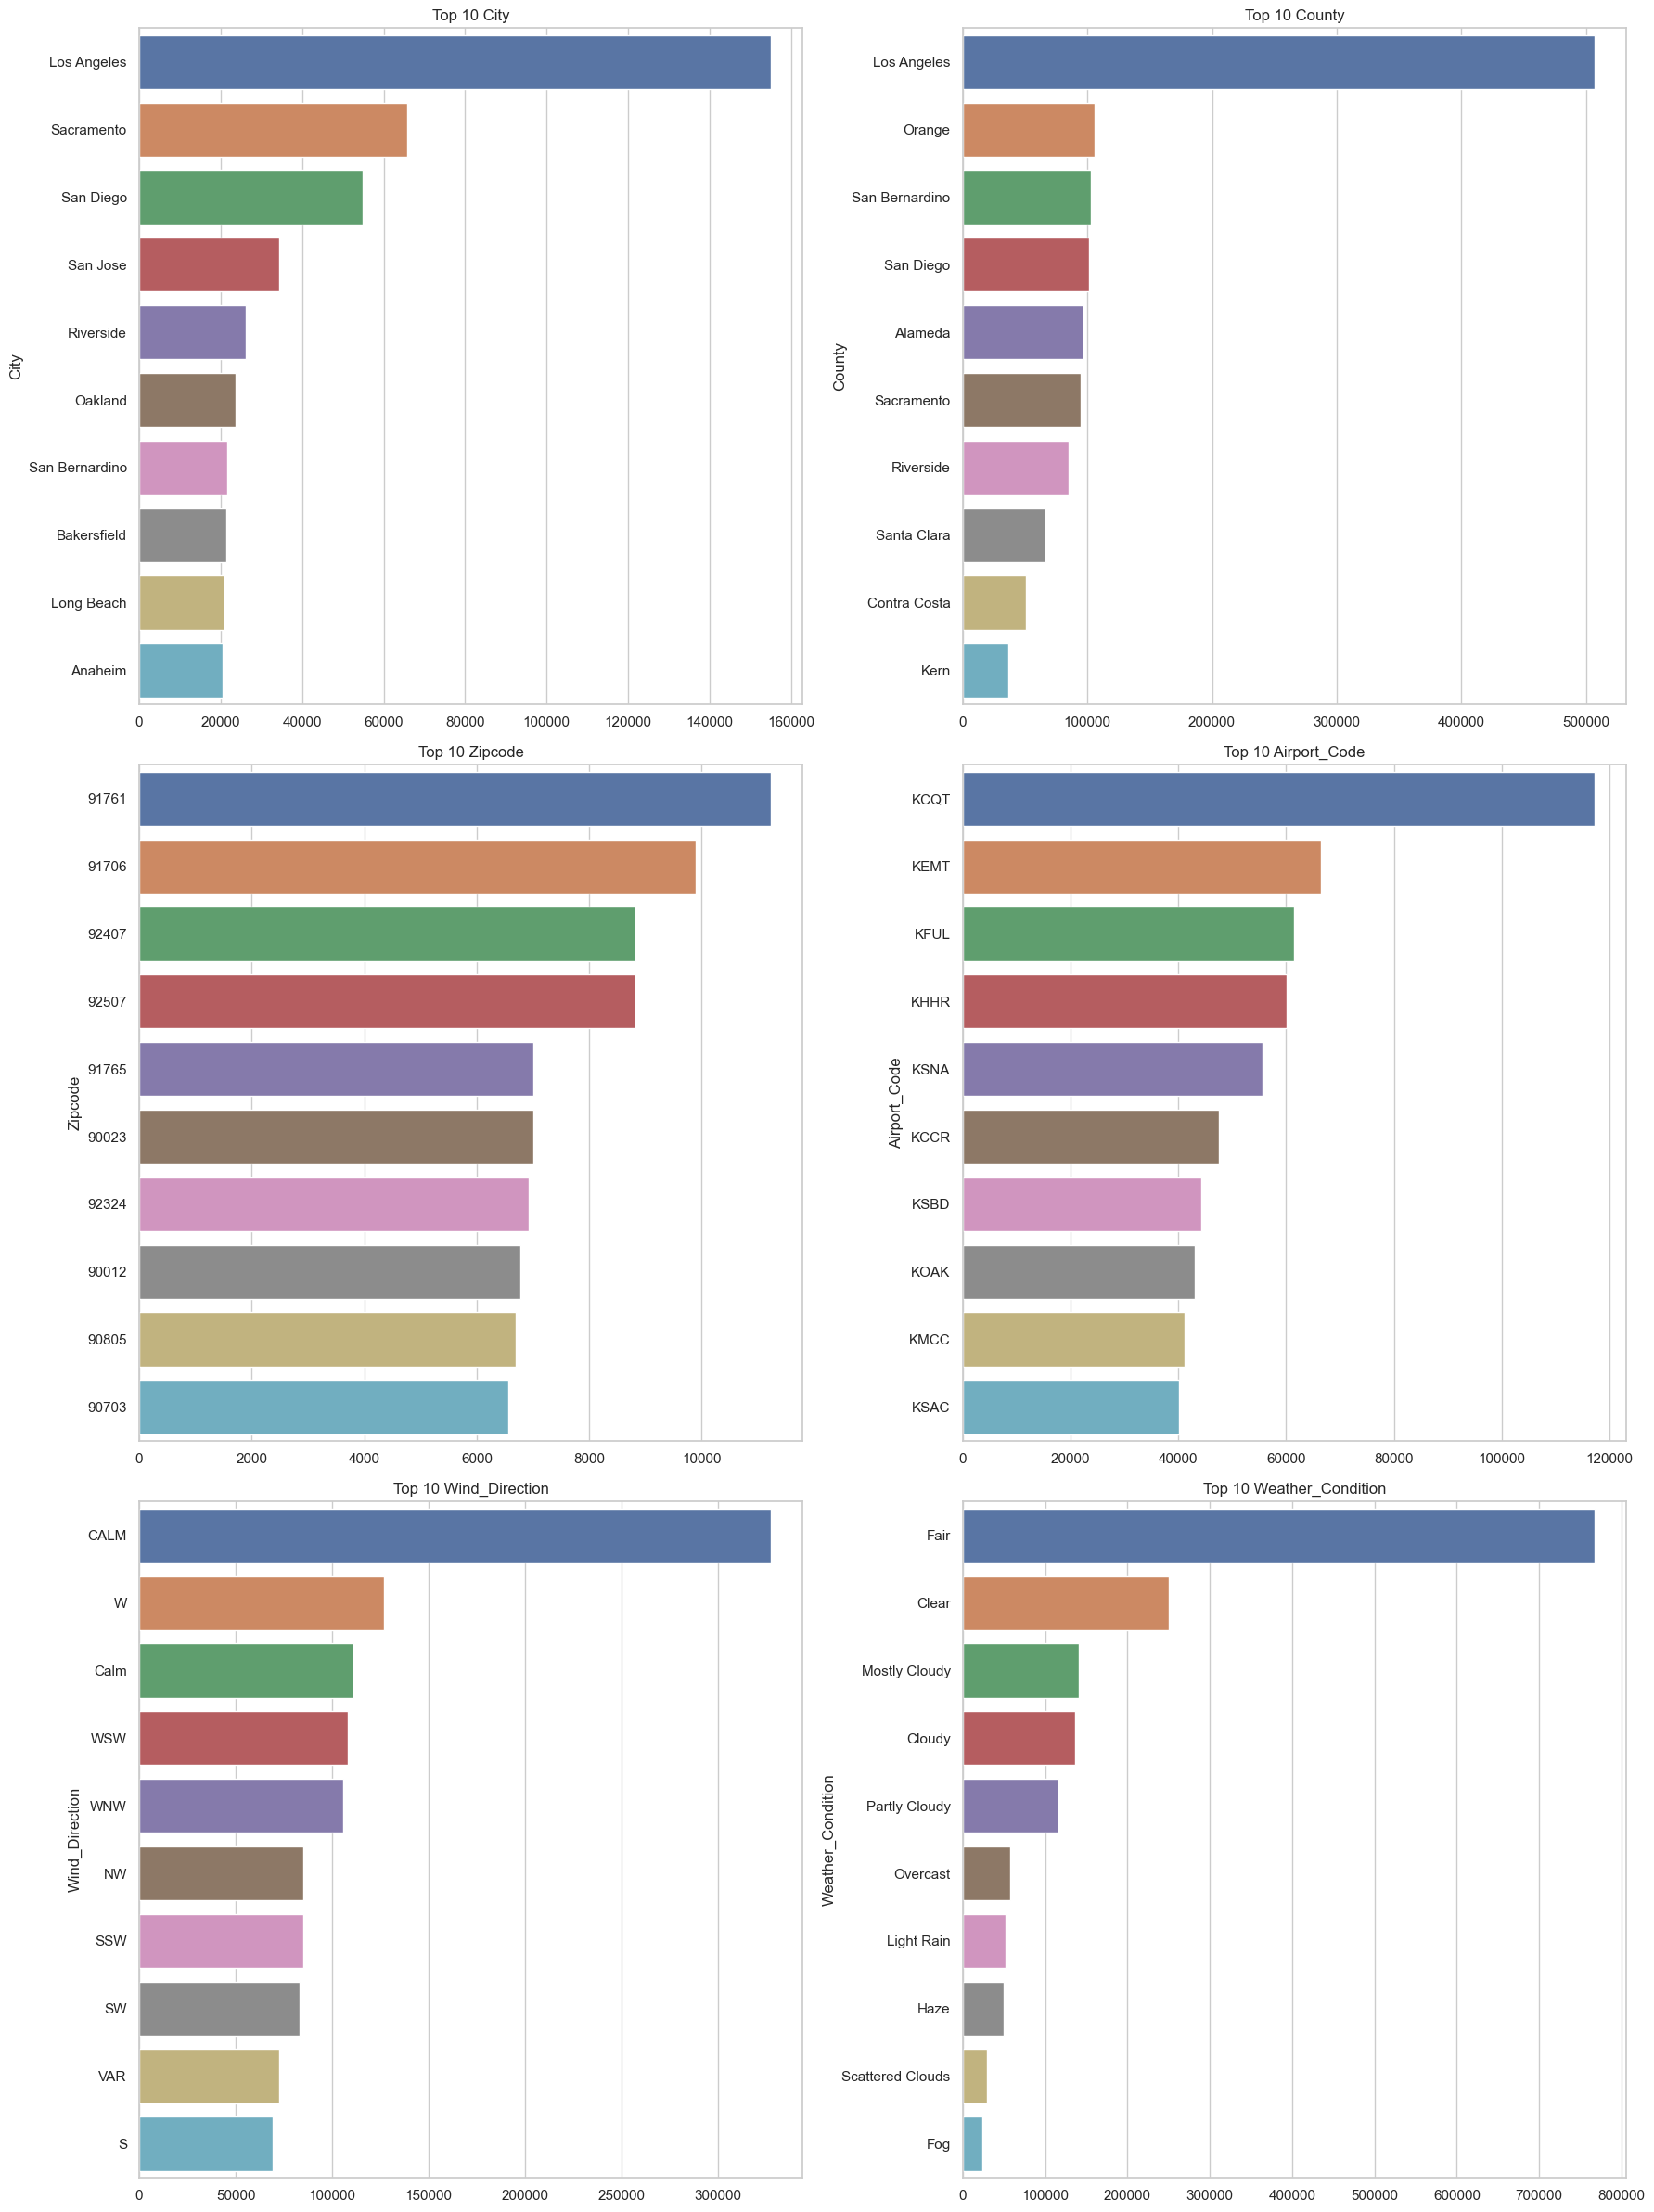

In [121]:
plt.figure(figsize=(18, 24))

cols = ['City', 'County', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']

for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)  
    order = df[col].value_counts().iloc[:10].index
    sns.barplot(x=df[col].value_counts().iloc[:10].values, y=order)
    plt.title(f'Top 10 {col}')

plt.tight_layout()
plt.show()

Inferences:
1. **City and County**: The distribution of accidents is not uniform across cities and counties, with locations like Los Angeles having a significantly higher number of reported accidents. This could indicate urban areas with higher traffic volumes or areas with higher accident reporting rates.

2. **Zipcode**: Accidents are concentrated in certain zip codes, suggesting specific areas that might have higher traffic or risk factors contributing to accidents.

3. **Airport_Code**: The presence of certain airport codes may correlate with traffic patterns or could reflect the proximity to major roads or urban centers.

4. **Wind_Direction**: The wind direction 'CALM' is the most frequently reported condition, followed by various specific directions, indicating that wind direction is a well-recorded feature but may not have a strong influence on the frequency of accidents.

5. **Weather_Condition**: 'Fair' and 'Clear' are the most common weather conditions reported during accidents, which may suggest that adverse weather is not a leading cause of accidents in this dataset.

In [122]:
# Checking Boolean Variables
print(df.select_dtypes(include=['bool', 'category']).describe().T)

                   count unique    top     freq
Amenity          1686299      2  False  1673840
Bump             1686299      2  False  1685285
Crossing         1686299      2  False  1595542
Give_Way         1686299      2  False  1684191
Junction         1686299      2  False  1505427
No_Exit          1686299      2  False  1684465
Railway          1686299      2  False  1669609
Roundabout       1686299      2  False  1686240
Station          1686299      2  False  1646679
Stop             1686299      2  False  1632624
Traffic_Calming  1686299      2  False  1684824
Traffic_Signal   1686299      2  False  1555601


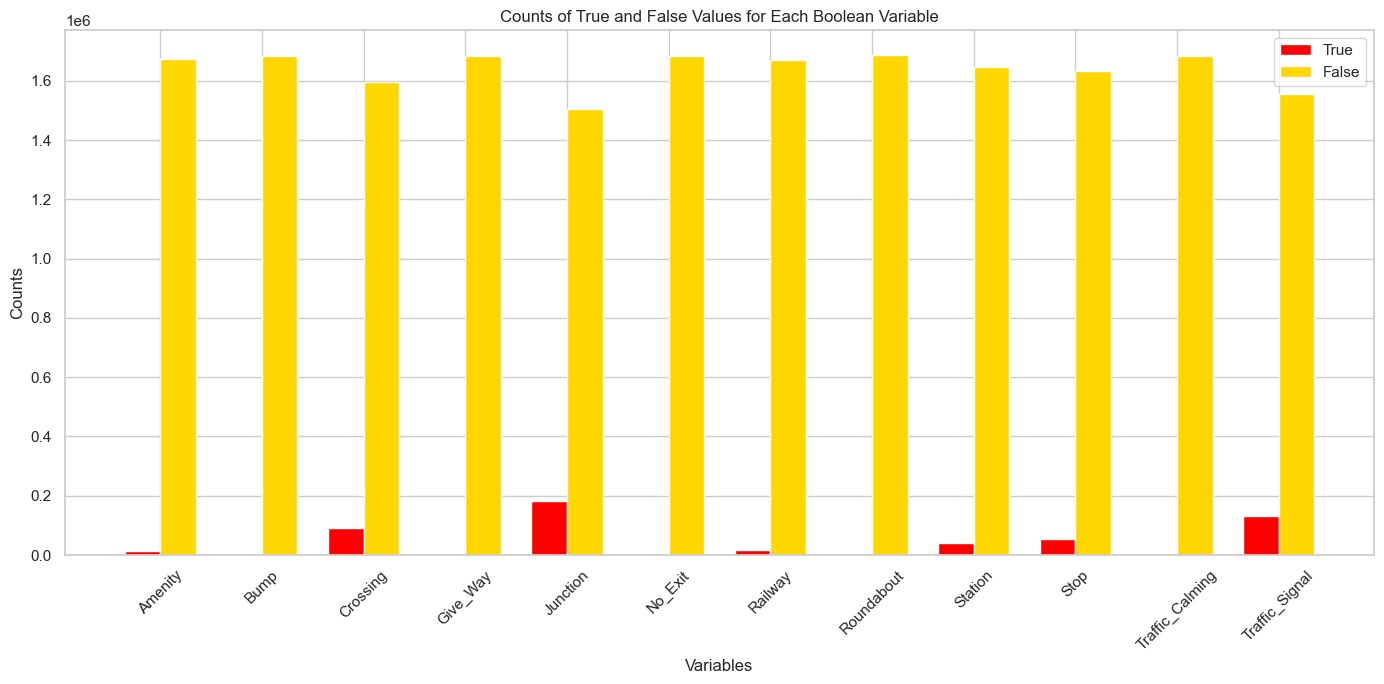

In [123]:
bool_df = df.select_dtypes(include='bool')

true_counts = bool_df.sum(axis=0)

false_counts = len(df) - true_counts

n = len(bool_df.columns)
ind = np.arange(n) 
width = 0.35       

fig, ax = plt.subplots(figsize=(14, 7))
true_bars = ax.bar(ind, true_counts, width, label='True', color='red')
false_bars = ax.bar(ind + width, false_counts, width, label='False', color='gold')
ax.set_xlabel('Variables')
ax.set_ylabel('Counts')
ax.set_title('Counts of True and False Values for Each Boolean Variable')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(bool_df.columns, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

This indicates that Accidents happen in places where such factors are *not* present which can be pre-assumed because for example; It is more likely for an accident to take place where Traffic Sign or a bump is absent.

### 5.3 Correlation Analysis

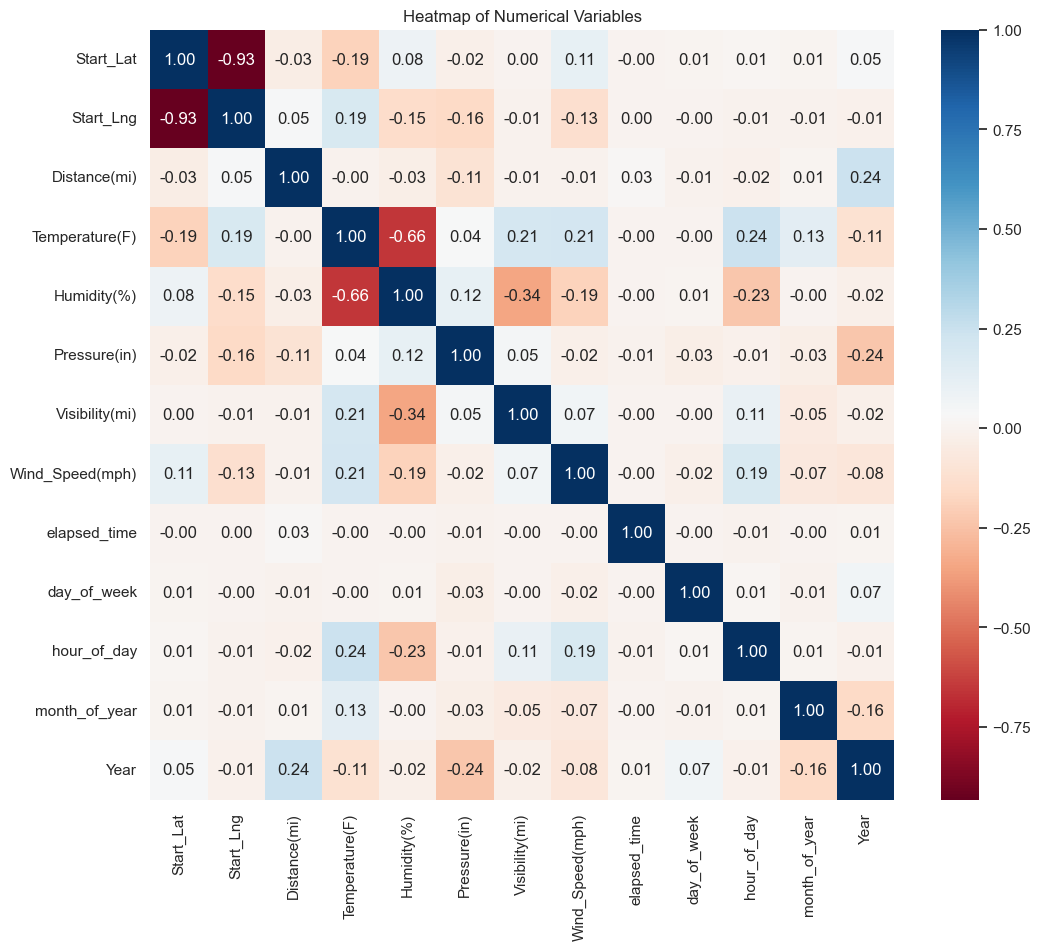

In [124]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

corr = numerical_df.drop(columns =["Severity"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu')
plt.title('Heatmap of Numerical Variables')
plt.show()

### 5.4 Geospatial Analysis

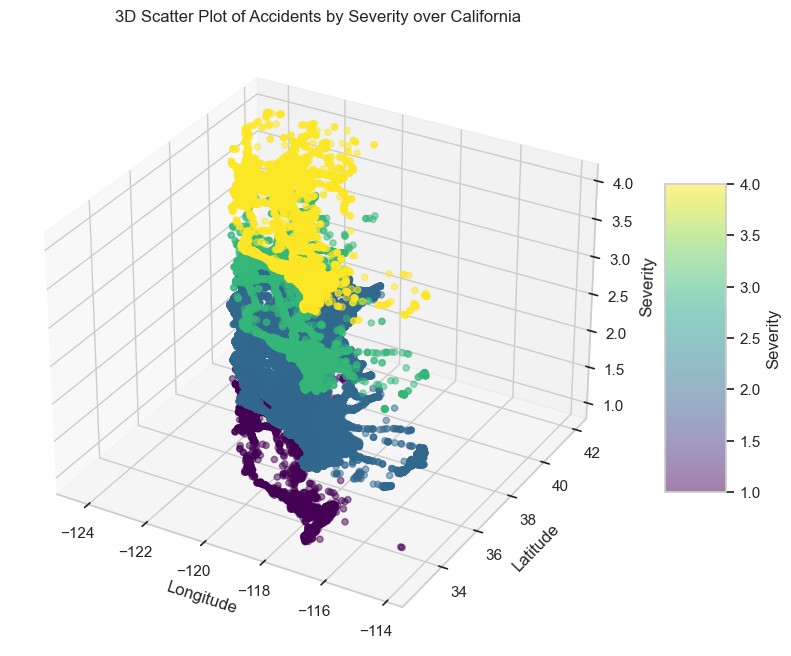

In [125]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Start_Lng'], df['Start_Lat'], df['Severity'],
                     c=df['Severity'], cmap='viridis', alpha=0.5)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Severity')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Severity')

ax.set_title('3D Scatter Plot of Accidents by Severity over California')

plt.show()

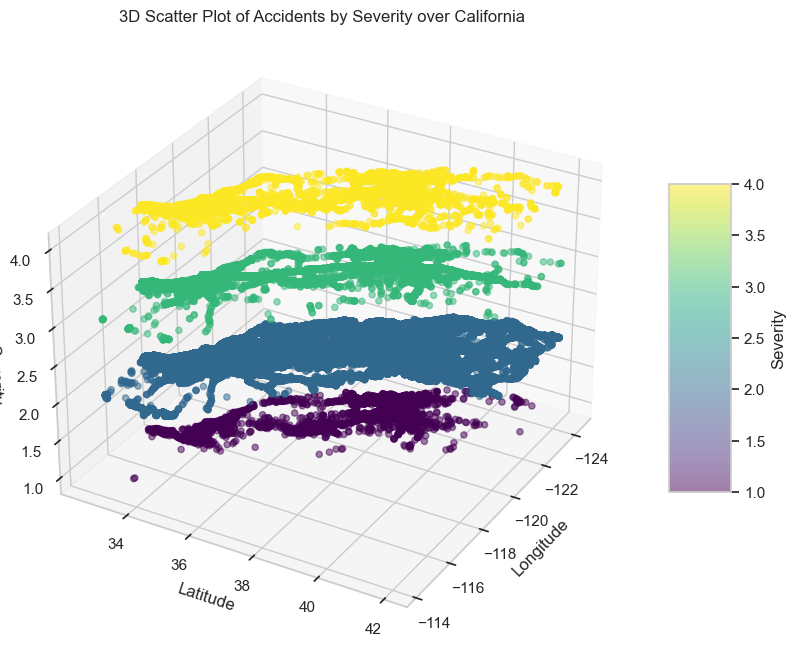

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Start_Lng'], df['Start_Lat'], df['Severity'],
                     c=df['Severity'], cmap='viridis', alpha=0.5)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Severity')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Severity')

ax.set_title('3D Scatter Plot of Accidents by Severity over California')
ax.view_init(elev=30, azim=30) 

plt.show()

Inference:

1. Accidents are distributed across the state but seem to be concentrated in certain areas, possibly around major cities or along specific highways.

2. The severity of accidents (color-coded) varies across the state. It appears that areas with a higher density of accidents also show a range of severities from low (blue) to high (yellow).

3. There's a noticeable cluster of high-severity accidents in one area, which could indicate a region with more severe accidents or could be a data reporting artifact.



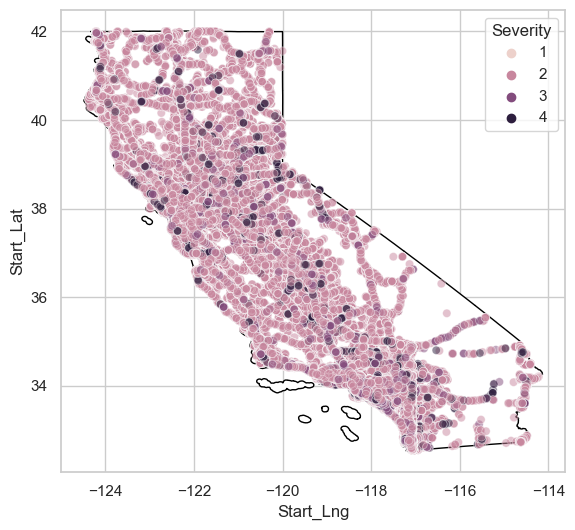

In [127]:
# Plotting the Accidents according to severity on the California Map
california_map = gpd.read_file('1.shp')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
california_map.plot(ax=ax, color='white', edgecolor='black')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='Severity', alpha=0.5, ax=ax)

plt.show()

### Temporal Analysis

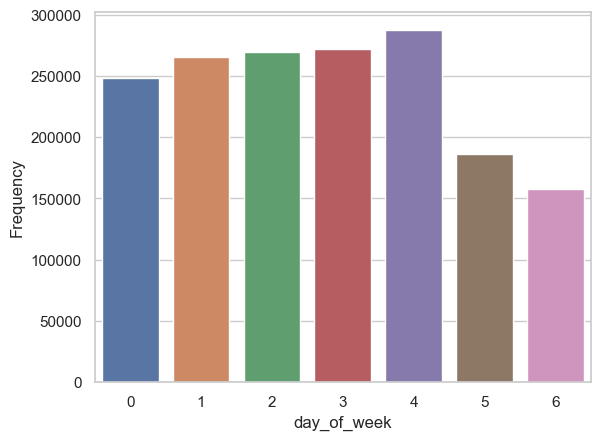

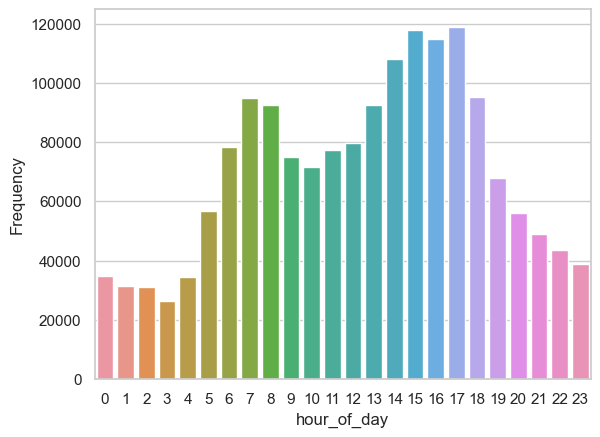

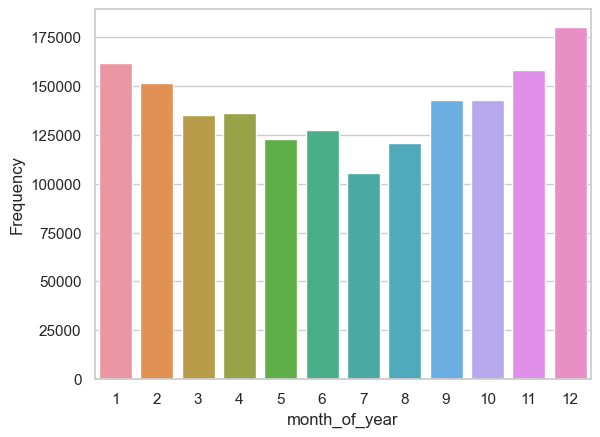

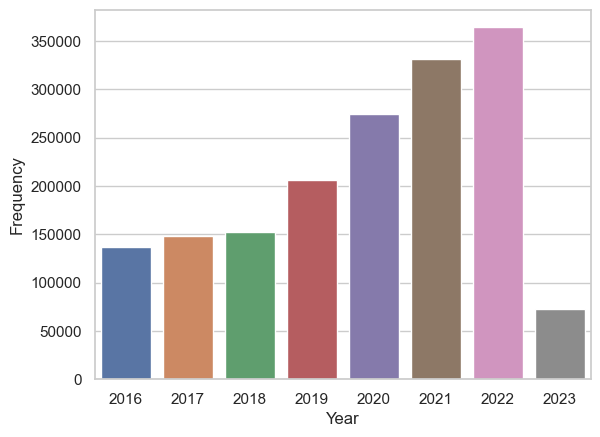

In [128]:
cols = ['day_of_week','hour_of_day','month_of_year','Year']

for i in cols:
    sns.countplot(x=i, data=df)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


**Day of Week Analysis**

- Accidents are relatively consistent across the weekdays, with a slight decrease on weekends.
- This could indicate that rush hour traffic during the workweek plays a role in accident frequency.

**Hour of Day Analysis**

- Accident frequency increases from the early morning, peaks around midday to the afternoon, then decreases towards the night.
- The high frequency in the daytime could be related to higher traffic volumes and increased travel during these hours.


**Month of Year Analysis**

- There's a noticeable peak in accidents at the beginning and the end of the year, with the lowest frequency around August.
- Seasonal factors, such as weather conditions or holiday travel, may influence these trends.


In [130]:
# Unique Months in 2023
df[df['Start_Time'].dt.year == 2023]['Start_Time'].dt.month.unique()

array([3, 2, 1], dtype=int32)

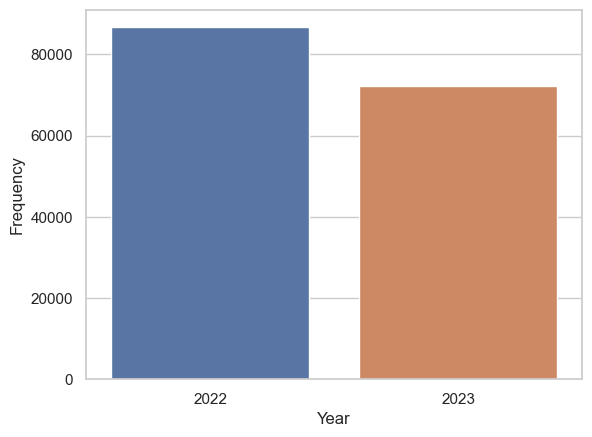

In [133]:
# Comparing 2023 and 2022
df_filtered = df[(df['Year'].isin([2022, 2023])) & (df['month_of_year'].isin([1, 2, 3]))]

sns.countplot(x='Year', data=df_filtered)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

General trend according to the graphs is that, as the years increase, the frequency of accidents also increase. For 2023, we cannot say that the frequency decreased overall as we have data of only 3 months for the year 2023 and comparing the data for those three months with data of 3 months for the year 2022, we see that the difference is comparable. It could be possible that the total number of accidents increased in 2023 compared to 2022.

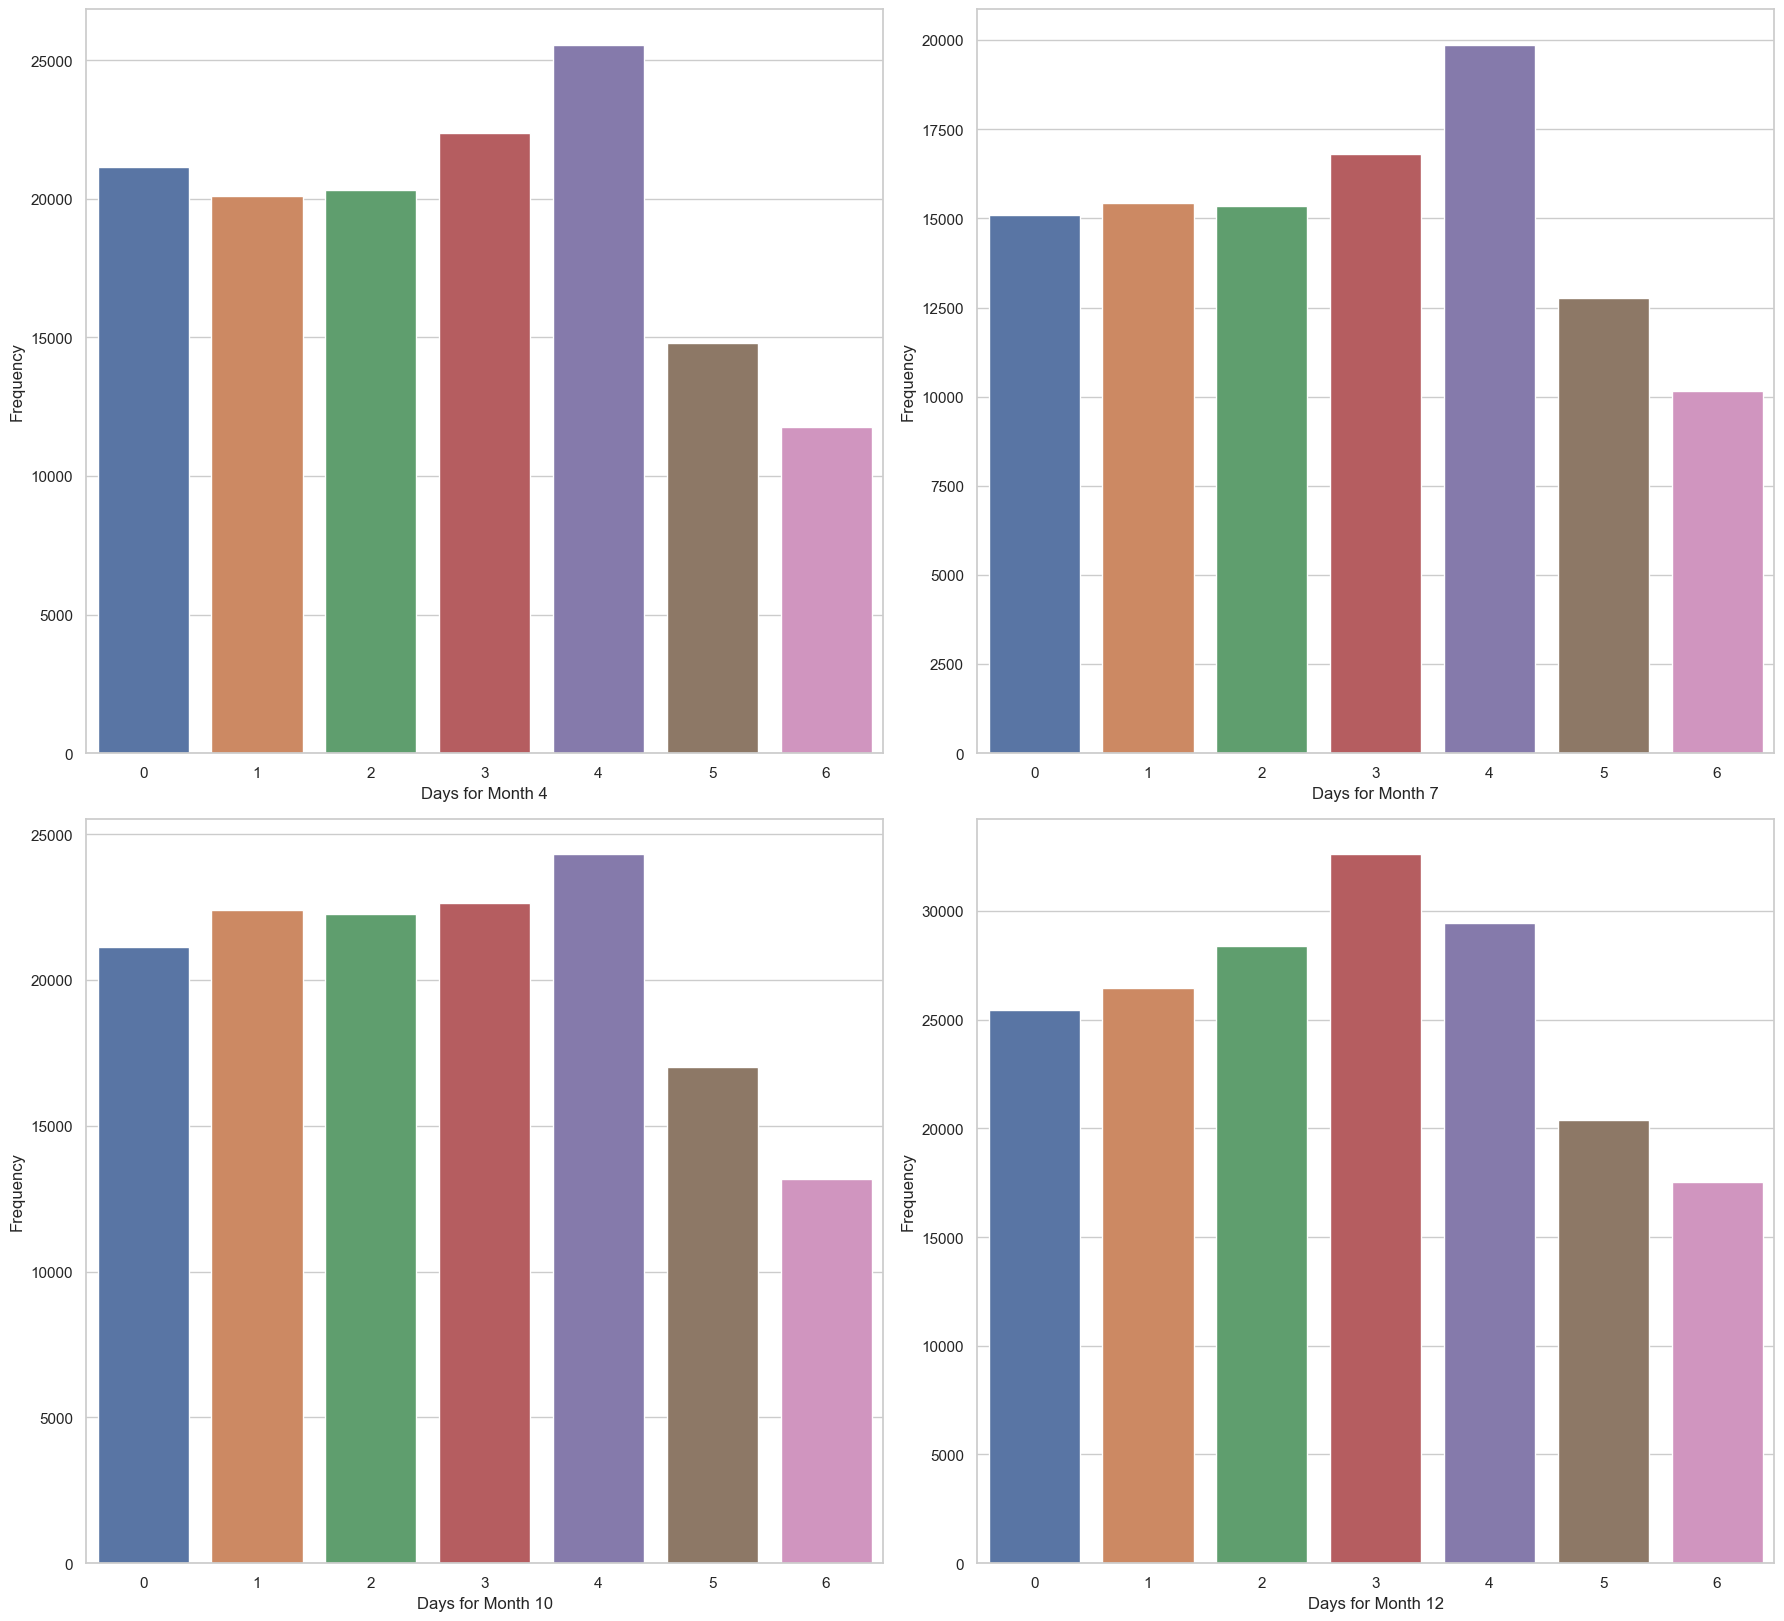

In [163]:
# Comparing Hours for months April, June, December
plt.figure(figsize=(18, 24))

months = [4 ,7, 10, 12]

for i in [0,1,2,3]:
    df_filtered = df[(df['month_of_year'].isin([months[i]]))]
    plt.subplot(3,2,i+1)
    sns.countplot(x='day_of_week', data=df_filtered)
    plt.xlabel(f'Days for Month {months[i]}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

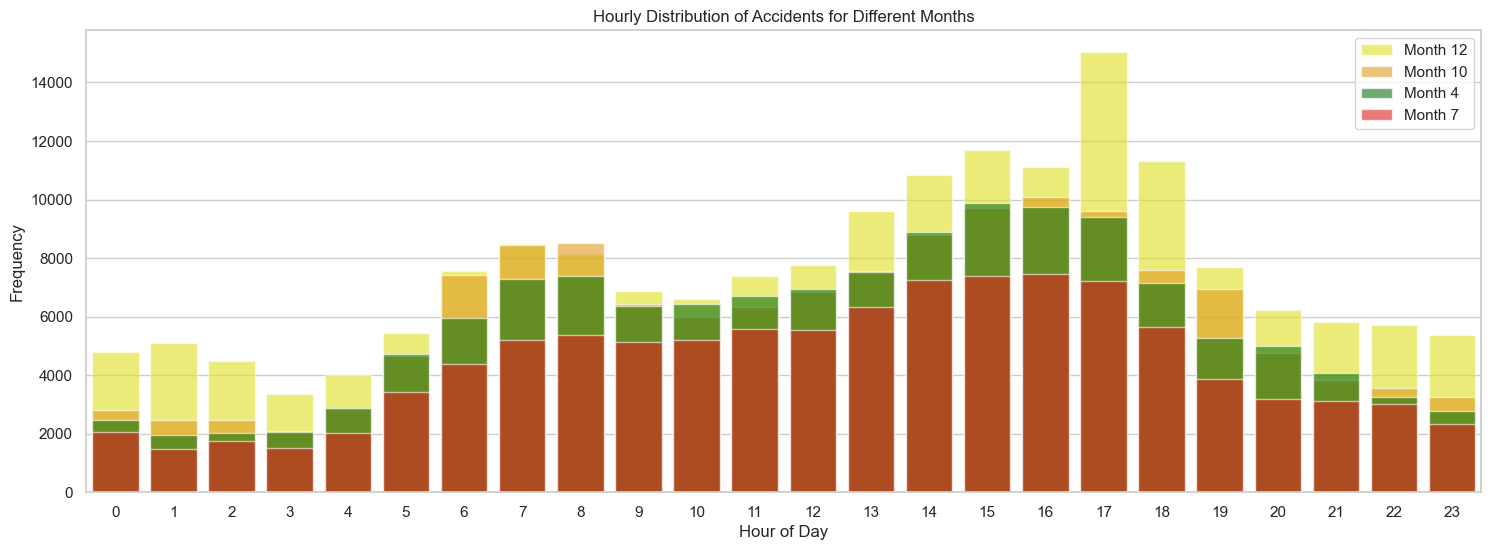

In [160]:
plt.figure(figsize=(18, 6))
months = [7, 4, 10, 12]
colors = ['red', 'green', 'orange', 'yellow']
colors.reverse()
months.reverse()

for i, month in enumerate(months):
    df_filtered = df[df['month_of_year'] == month]
    sns.countplot(x='hour_of_day', data=df_filtered, color=colors[i], alpha=0.6, label=f'Month {month}')


plt.title('Hourly Distribution of Accidents for Different Months')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()  
plt.show()                  

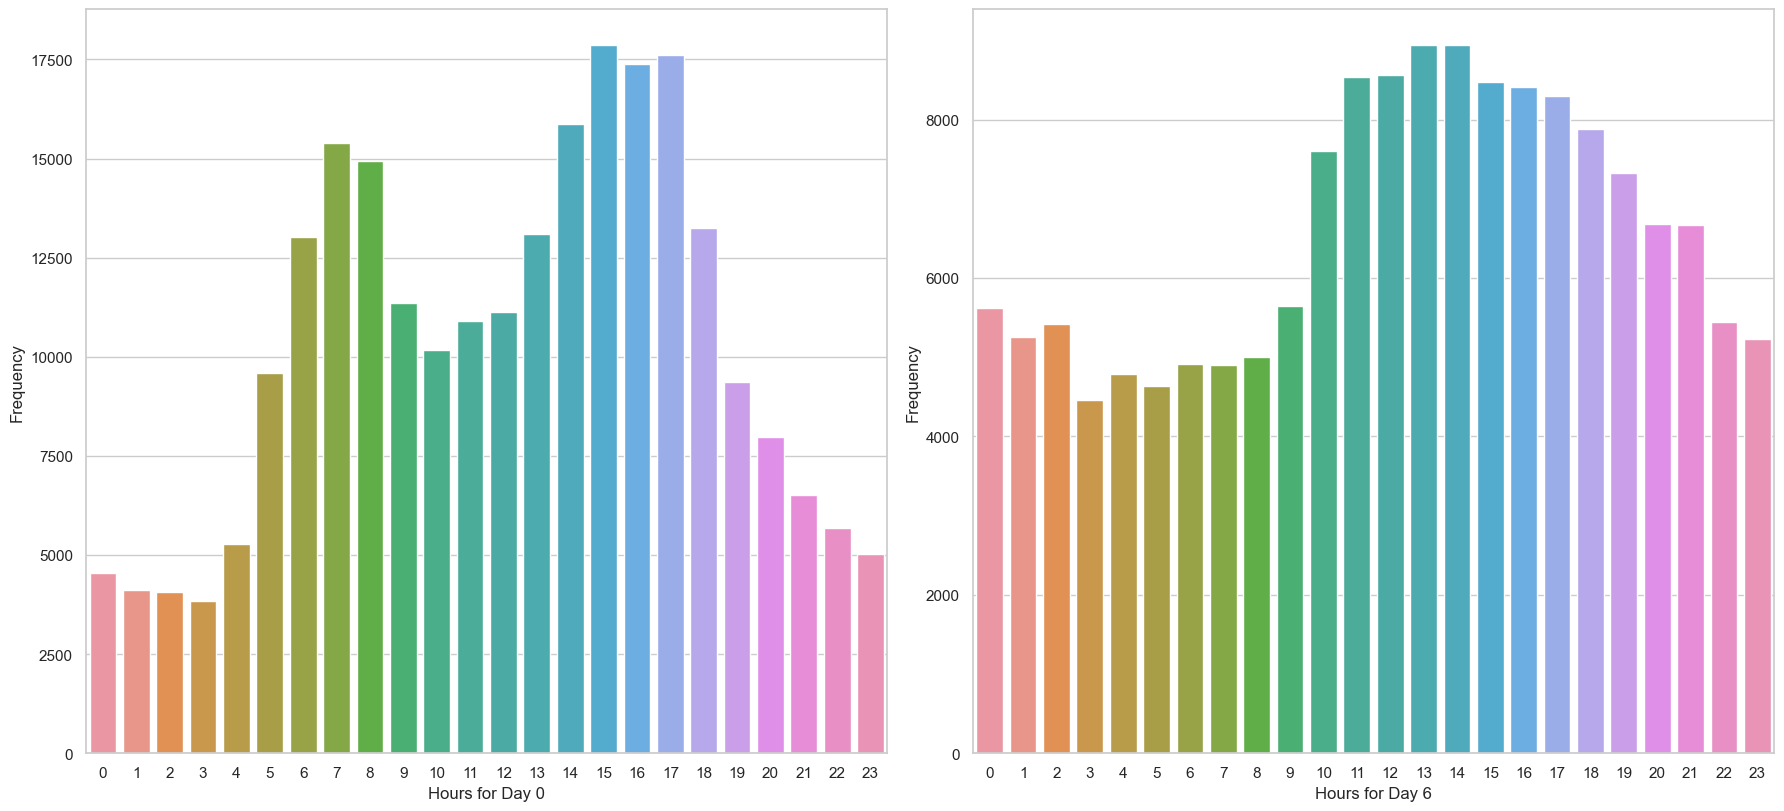

In [162]:
plt.figure(figsize=(18, 24))

days = [0, 6]

for i in [0,1]:
    df_filtered = df[(df['day_of_week'].isin([days[i]]))]
    plt.subplot(3,2,i+1)
    sns.countplot(x='hour_of_day', data=df_filtered)
    plt.xlabel(f'Hours for Day {days[i]}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6. Saving the Data

In [165]:
#df.to_csv("df1", index=False)